In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv ("Ventas.csv", index_col=[0])
df

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
Producto,,,,,,,,,,,,,,,,,,,,,
P40,41,27,27,51,37,38,48,40,39,40,...,23,38,36,40,44,39,37,24,27,22


In [55]:
df_transpose = df.T
df_transpose.head()

Producto,P40
W0,41
W1,27
W2,27
W3,51
W4,37


In [56]:
df_transpose.describe()

Producto,P40
count,52.000000
mean,35.846154
std,7.897343
min,22.000000
25%,29.750000
50%,37.000000
75%,40.250000
max,51.000000


In [57]:
df_transpose['P40'].mean()


np.float64(35.84615384615385)

In [58]:
df_transpose['P40'].median()

np.float64(37.0)

In [59]:

df_transpose['P40'].mode()

0    38
Name: P40, dtype: int64

In [112]:
df_transpose['P40'].var()

np.float64(62.36802413273002)

In [64]:
dfi = df_transpose.reset_index()
dfi.head()

Producto,index,P40
0,W0,41
1,W1,27
2,W2,27
3,W3,51
4,W4,37


In [110]:
media = np.mean(df_transpose['P40'])
mediana = np.median(df_transpose['P40'])


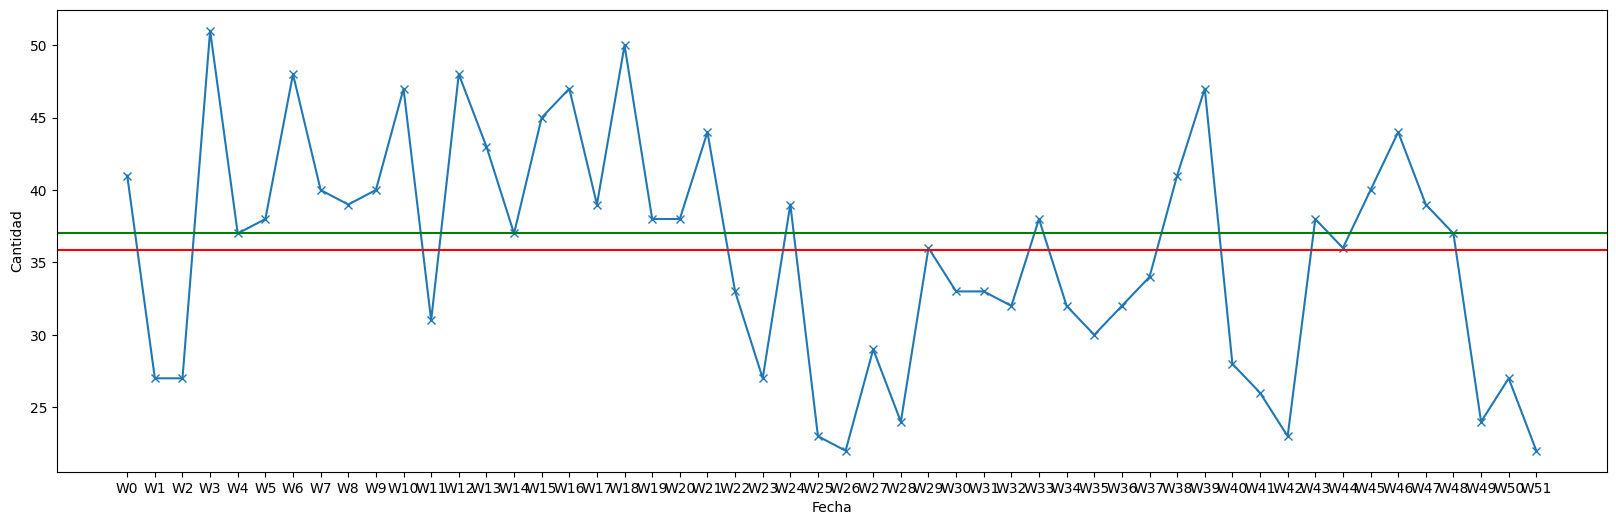

In [111]:
plt.figure(figsize=(20,6))
plt.plot(dfi['index'],dfi['P40'], marker= 'x')
plt.ylabel('Cantidad')
plt.xlabel('Fecha')
plt.axhline(media,color='r', label= 'media')
plt.axhline(mediana,color='g', label= 'mediana')
plt.show()


In [197]:
frecus = dfi['P40'].value_counts()
frecus1 = frecus.sort_index()
frecus2 = frecus1.reset_index()
frecus2


,P40,count
0,22,2
1,23,2
2,24,2
3,26,1
4,27,4
5,28,1
6,29,1
7,30,1
8,31,1
9,32,3


In [199]:
range_20to29 = frecus2.loc[(frecus2['P40'] >= 20) & (frecus2['P40'] <= 29), 'count'].sum()
range_30to39 = frecus2.loc[(frecus2['P40'] >= 30) & (frecus2['P40'] <= 39), 'count'].sum()
range_40to49 = frecus2.loc[(frecus2['P40'] >= 40) & (frecus2['P40'] <= 49), 'count'].sum()
range_50to59 = frecus2.loc[(frecus2['P40'] >= 50) & (frecus2['P40'] <= 59), 'count'].sum()
print(range_20to29)
print(range_30to39)
print(range_40to49)
print(range_50to59)


13
23
14
2


In [272]:
freq_tab = {'Rangos': ['20-29','30-39','40-49', '50-59'], 
            'Frecuencia': [range_20to29 ,range_30to39, range_40to49,range_50to59],
            'F Acum': [(range_20to29),(range_20to29+range_30to39), (range_20to29+range_30to39+range_40to49),(range_20to29+range_30to39+range_40to49+range_50to59)],
            'F Relativa': [(range_20to29/52) ,(range_30to39/52), (range_40to49/52), (range_50to59/52)],
            'F Rel Acum': [(range_20to29/52) ,((range_20to29+range_30to39)/52), ((range_20to29+range_30to39+range_40to49)/52), ((range_20to29+range_30to39+range_40to49+range_50to59)/52)],
            'F %': [((range_20to29/52)*100) ,((range_30to39/52)*100), ((range_40to49/52)*100), ((range_50to59/52)*100)],
            'F % Acum': [((range_20to29/52)*100) ,(((range_20to29+range_30to39)/52)*100), (((range_20to29+range_30to39+range_40to49)/52)*100), (((range_20to29+range_30to39+range_40to49+range_50to59)/52)*100)],
            }
ft= pd.DataFrame(freq_tab)
print(ft)


  Rangos  Frecuencia  F Acum  F Relativa  F Rel Acum        F %    F % Acum
0  20-29          13      13    0.250000    0.250000  25.000000   25.000000
1  30-39          23      36    0.442308    0.692308  44.230769   69.230769
2  40-49          14      50    0.269231    0.961538  26.923077   96.153846
3  50-59           2      52    0.038462    1.000000   3.846154  100.000000


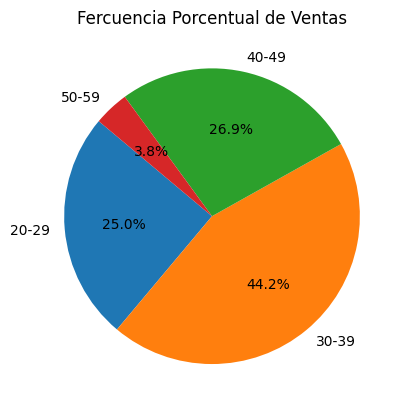

In [266]:
plt.pie(ft['F %'], labels=ft['Rangos'], autopct='%1.1f%%', startangle=140)
plt.title('Fercuencia Porcentual de Ventas')
plt.show()

In [296]:
datos =  {'Rangos de Ventas': ft['Rangos'], 'Frec_%': ft['F %']}
fts = pd.DataFrame(datos)
fts.dtypes


Rangos de Ventas     object
Frec_%              float64
dtype: object